In [1]:
%matplotlib inline

from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import ticker

In [2]:
seed = 418
dirname = 'pp.mn.%d' % (seed,)
fnames = glob('../%s/*.dist' % (dirname,))

In [3]:
Ns = sorted(set([int(f.split('/')[-1].split('.')[1]) for f in fnames]))
Ms = sorted(set([int(f.split('/')[-1].split('.')[2]) for f in fnames]))

In [4]:
f_aggregates_c = ['../%s/aggregate.%d.preprocess.c' % (dirname, m,) for m in Ms]
assert set(f_aggregates_c) == set(glob('../%s/aggregate*.c' % (dirname,)))

In [5]:
f_aggregates_c

['../pp.mn.418/aggregate.10.preprocess.c',
 '../pp.mn.418/aggregate.100.preprocess.c',
 '../pp.mn.418/aggregate.1000.preprocess.c',
 '../pp.mn.418/aggregate.10000.preprocess.c',
 '../pp.mn.418/aggregate.100000.preprocess.c',
 '../pp.mn.418/aggregate.1000000.preprocess.c']

In [6]:
runtimes_c = [np.loadtxt(f, usecols=(1,2)) for f in f_aggregates_c]

In [7]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'

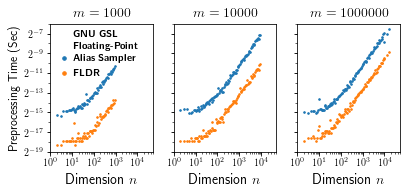

In [8]:
fig, axes = plt.subplots(ncols=3);

i = 0;
selections = [1000, 10000, 1000000]
Ms_plot = [(a, b) for a, b in enumerate(Ms) if b in selections]
for j, M in Ms_plot:

    ax = axes[i]; i += 1
    C = runtimes_c[j]

    ns = [n for n in Ns if n < M]

    # For large distributions some of the ns fail in GSL.
    assert len(C) <= len(ns) 

    c = len(C)
    xs = ns[:c]
    c0 = ax.scatter([], [], marker='.', s=50,
        label=r'\noindent\textbf{GNU GSL}\\\textbf{Floating-Point}\\\textbf{Alias Sampler}')
    c1 = ax.scatter([], [], marker='.', s=50,
        label=r'\textbf{FLDR}')

    ax.scatter(xs, C[:,1], marker='.', s=10, color=c0.get_facecolors()[0])
    ax.scatter(xs, C[:,0], marker='.', s=10, color=c1.get_facecolors()[0])

    ax.set_yscale('log', basey=2)
    ax.set_xscale('log', basex=10)
    ax.set_ylim([2**-19, 2**-6])
    ax.set_xlim([10**0, .5*10**5])

    ax.set_xlabel('Dimension $n$', fontsize=14)
    ax.set_title('$m = %d$' % (M,), fontsize=14)

axes[0].set_ylabel('Preprocessing Time (Sec)', fontsize=12)
axes[0].legend(
    loc='upper left', framealpha=0, handletextpad=-.1,
    bbox_to_anchor=(-.05, 1.02))

for i in [1, 2]:
    axes[i].set_yticklabels([])

for i in [0, 1, 2]:
    axes[i].yaxis.set_minor_formatter(ticker.NullFormatter())
    axes[i].yaxis.set_major_locator(ticker.LogLocator(base=2, subs=[1], numticks=10))
    axes[i].yaxis.set_minor_locator(ticker.LogLocator(base=2, subs=[1], numticks=100))
    
    axes[i].xaxis.set_minor_formatter(ticker.NullFormatter())
    axes[i].xaxis.set_major_locator(ticker.LogLocator(base=10, subs=[1], numticks=10))
    axes[i].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10)*.1, numticks=100))

    # axes[i].grid(which='both', color='black', alpha=.1, linestyle='-')

fig.set_size_inches(5.8, 2.8)
fig.set_tight_layout(True)
for ext in ['pdf', 'png']:
    fig.savefig('figure-5-preprocessing-time.%s' % (ext,))